In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
train = pd.read_csv("train_preprocessed.csv", sep='\t', index_col=0)
train

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.0,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,1.0,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.0,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.0,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...,...
7411,0.0,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,1.0,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,1.0,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,1.0,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [3]:
X_train = train[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_train = train[['indicator']]

In [4]:
test = pd.read_csv("test_preprocessed.csv", sep='\t', index_col=0)
test

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.665906,0.100535,0.670131,0.188402,0.774156,0.854971
1,1.0,0.431031,0.292957,0.505078,0.574594,0.519243,0.138992
2,0.0,0.833333,0.927602,0.804264,0.888889,0.888889,0.344746
3,0.0,0.166667,0.494079,0.837628,0.298132,0.111111,0.832973
4,0.0,0.326503,0.585516,0.378796,0.506597,0.460350,0.743430
...,...,...,...,...,...,...,...
2467,0.0,0.596222,0.650872,0.252858,0.504795,0.484935,0.560478
2468,0.0,0.166667,0.338466,0.468159,0.448032,0.247005,0.344596
2469,1.0,0.726931,0.265893,0.137857,0.404205,0.333889,0.602692
2470,0.0,0.166667,0.902223,0.515914,0.573236,0.463605,0.353606


In [5]:
X_test = test[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_test = test[['indicator']]

In [6]:
X_train

,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...
7411,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree

# 2. Natrénovanie strojového učenia - stromový algoritmus
Vytvorenie funkcie pre natrénovanie a následné otestovanie algoritmu decision tree

In [8]:
def predict_tree(i):
    if (i == 0):
        clf = DecisionTreeClassifier()
    else:
        print("Depth = ",i)
        clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [9]:
strom = predict_tree(0)

Accuracy =  0.8236245954692557  Precision =  0.8559748427672956  Recall =  0.8679846938775511


Ako vidíme strom má presnosť 82% a zvyšné metriky Precision a Recall okolo 86%

In [10]:
strom.tree_.max_depth

26

Strom má hĺbku 26 a pri vizualizácií vidíme, že pri aktuálnej veľkosti je veľmi neprehľadný

[Text(284.4168950661478, 640.24, 'X[1] <= 0.381\ngini = 0.458\nsamples = 7416\nvalue = [2627, 4789]'),
 Text(146.01445992242589, 616.08, 'X[5] <= 0.926\ngini = 0.188\nsamples = 2868\nvalue = [301, 2567]'),
 Text(100.26147648151719, 591.9200000000001, 'X[1] <= 0.352\ngini = 0.122\nsamples = 2412\nvalue = [157, 2255]'),
 Text(67.04683807933041, 567.76, 'X[3] <= 0.0\ngini = 0.1\nsamples = 2223\nvalue = [117, 2106]'),
 Text(66.153484386156, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(67.94019177250483, 543.6, 'X[3] <= 0.809\ngini = 0.099\nsamples = 2222\nvalue = [116, 2106]'),
 Text(31.410346386562505, 519.44, 'X[5] <= 0.36\ngini = 0.086\nsamples = 1937\nvalue = [87, 1850]'),
 Text(5.8067990056336996, 495.2800000000001, 'X[0] <= 0.087\ngini = 0.038\nsamples = 518\nvalue = [10, 508]'),
 Text(2.680061079523246, 471.12000000000006, 'X[0] <= 0.086\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(1.7867073863488308, 446.96000000000004, 'X[0] <= 0.073\ngini = 0.08\nsamples = 24

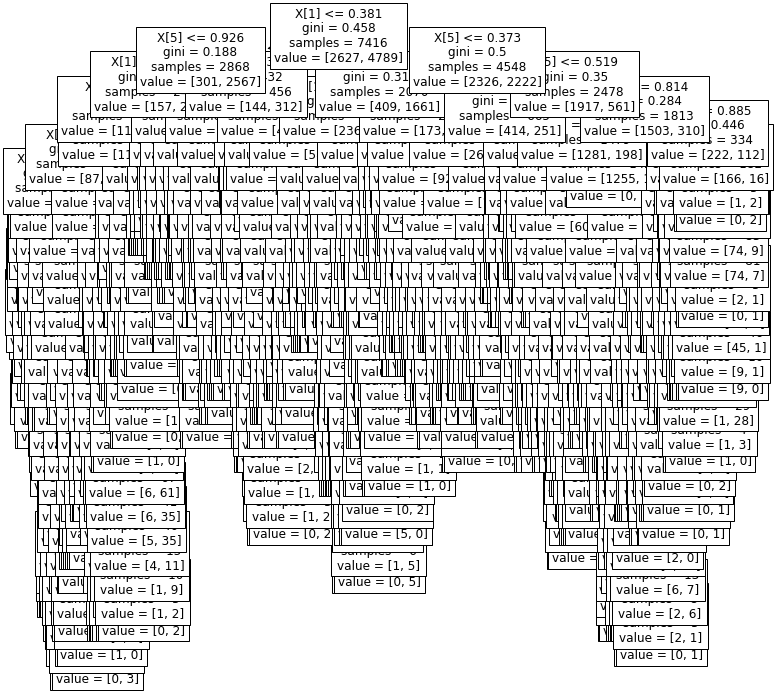

In [11]:
plt.figure(figsize=(12,12))
tree.plot_tree(strom,fontsize = 12)

# 3. Hyperparameter tuning

1. max_depth = limituje hĺbku maximálnou hodnotou
2. min_samples_leaf = minimálny počet samplov na 1 liste
3. max_leaf_nodes = maximálny konečný počet listov
4. max_features = určuje počet parametrov ktoré sa náhodne vyberú a použijú pri rozdelovaní

In [12]:
lst = []
for i in range(1,30):
    lst.append(predict_tree(i))

Depth =  1
Accuracy =  0.6678802588996764  Precision =  0.890282131661442  Recall =  0.5433673469387755
Depth =  2
Accuracy =  0.8305016181229773  Precision =  0.8496652465003043  Recall =  0.8903061224489796
Depth =  3
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4
Accuracy =  0.8543689320388349  Precision =  0.8856960408684547  Recall =  0.8845663265306123
Depth =  5
Accuracy =  0.8559870550161812  Precision =  0.8594306049822064  Recall =  0.9241071428571429
Depth =  6
Accuracy =  0.8499190938511327  Precision =  0.8522660388463802  Recall =  0.923469387755102
Depth =  7
Accuracy =  0.8640776699029126  Precision =  0.8888888888888888  Recall =  0.8979591836734694
Depth =  8
Accuracy =  0.8648867313915858  Precision =  0.889520202020202  Recall =  0.8985969387755102
Depth =  9
Accuracy =  0.8539644012944984  Precision =  0.8673158855751674  Recall =  0.9088010204081632
Depth =  10
Accuracy =  0.857200647249191  Precision =  0.

Najlepšie vyšla presnosť hĺbkam medzi 3 a 10, pri čom, najlepšia bola hĺbka = 8
Najlepší precision bol v hĺbkach 1,3,7,8 a najlepší recall v 5,6,7,8
Teda pri skúšaní ďaľších parametrov sa budeme sústrediť na hĺbku od 3 po 8
Ďalej sa pozrieme na parameter min_samples_leaf ktorý určuje minimálny počet vzorky na liste

In [13]:
def predict_tree_MinSample(i,j):
    print("Depth = ",i," Min sample leaf = ",j)
    clf = DecisionTreeClassifier(max_depth = i,min_samples_leaf = j)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [14]:
for j in range (1,400,50):
    for i in range(3,9):
        predict_tree_MinSample(i,j)

Depth =  3  Min sample leaf =  1
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4  Min sample leaf =  1
Accuracy =  0.8543689320388349  Precision =  0.8856960408684547  Recall =  0.8845663265306123
Depth =  5  Min sample leaf =  1
Accuracy =  0.8559870550161812  Precision =  0.8594306049822064  Recall =  0.9241071428571429
Depth =  6  Min sample leaf =  1
Accuracy =  0.8499190938511327  Precision =  0.8522660388463802  Recall =  0.923469387755102
Depth =  7  Min sample leaf =  1
Accuracy =  0.8632686084142395  Precision =  0.8877679697351829  Recall =  0.8979591836734694
Depth =  8  Min sample leaf =  1
Accuracy =  0.863673139158576  Precision =  0.8888186986734049  Recall =  0.8973214285714286
Depth =  3  Min sample leaf =  51
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4  Min sample leaf =  51
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8

Pri kombinácii maximálnej hĺbky 8 a minimálneho počtu samplov 51 bola maximálna presnosť 86,9% zatiaľ najvyššia dosiahnutá
Ako ďaľšie vyskúšame skombinovať viaceré parametre ako max_lead a min_samples

In [23]:
def predict_tree_MaxLeaf(i,j,acc_arr,k,l):
    print("Min Samples = ",i," Max leaf = ",j)
    clf = DecisionTreeClassifier(max_leaf_nodes = j,min_samples_leaf = i,max_features = k,random_state = l)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    acc_arr.append(acc)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [24]:
acc_arr = []
for j in range (30,71,10):
    for i in range(30,140,10):
        predict_tree_MaxLeaf(j,i,acc_arr,6,1)

Min Samples =  30  Max leaf =  30
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  30  Max leaf =  40
Accuracy =  0.8681229773462783  Precision =  0.8866749688667497  Recall =  0.9081632653061225
Min Samples =  30  Max leaf =  50
Accuracy =  0.8677184466019418  Precision =  0.8846869187848729  Recall =  0.9100765306122449
Min Samples =  30  Max leaf =  60
Accuracy =  0.8677184466019418  Precision =  0.8846869187848729  Recall =  0.9100765306122449
Min Samples =  30  Max leaf =  70
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  80
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  90
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  100
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  

In [25]:
index = acc_arr.index(max(acc_arr))
print("Acc = ",acc_arr[index], " index = ",index)

Acc =  0.8733818770226537  index =  0


V prípade pre minimálny počet samplov = 30 a maximálny počet listov = 30 je presnosť 87,33%, môžme skúsiť upresniť s parametrami max_features a random_state

In [26]:
# bezi zopar minut
acc_arr = []
lst_final = []
for j in range (25,35):
    for i in range (25,35):
        for k in range (1,7):
            for l in range (35,45):
                lst_final.append(predict_tree_MaxLeaf(j,i,acc_arr,k,l))

Min Samples =  25  Max leaf =  25
Accuracy =  0.7475728155339806  Precision =  0.7489451476793249  Recall =  0.9056122448979592
Min Samples =  25  Max leaf =  25
Accuracy =  0.7233009708737864  Precision =  0.7309299895506792  Recall =  0.892219387755102
Min Samples =  25  Max leaf =  25
Accuracy =  0.7103559870550162  Precision =  0.7762645914396887  Recall =  0.7633928571428571
Min Samples =  25  Max leaf =  25
Accuracy =  0.7629449838187702  Precision =  0.7573375262054507  Recall =  0.9215561224489796
Min Samples =  25  Max leaf =  25
Accuracy =  0.7682038834951457  Precision =  0.7506297229219143  Recall =  0.9502551020408163
Min Samples =  25  Max leaf =  25
Accuracy =  0.7686084142394822  Precision =  0.8081683168316832  Recall =  0.8329081632653061
Min Samples =  25  Max leaf =  25
Accuracy =  0.8207928802588996  Precision =  0.8444580526638089  Recall =  0.8794642857142857
Min Samples =  25  Max leaf =  25
Accuracy =  0.7512135922330098  Precision =  0.7509215376513955  Recall

Accuracy =  0.8555825242718447  Precision =  0.8619246861924686  Recall =  0.9196428571428571
Min Samples =  25  Max leaf =  26
Accuracy =  0.837378640776699  Precision =  0.8634663341645885  Recall =  0.8832908163265306
Min Samples =  25  Max leaf =  26
Accuracy =  0.8398058252427184  Precision =  0.8410942956926659  Recall =  0.9215561224489796
Min Samples =  25  Max leaf =  26
Accuracy =  0.8317152103559871  Precision =  0.8701799485861182  Recall =  0.8635204081632653
Min Samples =  25  Max leaf =  26
Accuracy =  0.8353559870550162  Precision =  0.8612321095208463  Recall =  0.8826530612244898
Min Samples =  25  Max leaf =  26
Accuracy =  0.8567961165048543  Precision =  0.8856416772554002  Recall =  0.889030612244898
Min Samples =  25  Max leaf =  26
Accuracy =  0.8143203883495146  Precision =  0.8366727383120826  Recall =  0.8788265306122449
Min Samples =  25  Max leaf =  26
Accuracy =  0.8349514563106796  Precision =  0.8452380952380952  Recall =  0.9056122448979592
Min Samples 

Accuracy =  0.8527508090614887  Precision =  0.8570581257413997  Recall =  0.9215561224489796
Min Samples =  25  Max leaf =  27
Accuracy =  0.8321197411003236  Precision =  0.8741077222582738  Recall =  0.8590561224489796
Min Samples =  25  Max leaf =  27
Accuracy =  0.8616504854368932  Precision =  0.8670658682634731  Recall =  0.923469387755102
Min Samples =  25  Max leaf =  27
Accuracy =  0.8584142394822006  Precision =  0.8690909090909091  Recall =  0.9145408163265306
Min Samples =  25  Max leaf =  27
Accuracy =  0.8737864077669902  Precision =  0.9020486555697823  Recall =  0.8985969387755102
Min Samples =  25  Max leaf =  27
Accuracy =  0.8656957928802589  Precision =  0.8981958762886598  Recall =  0.889030612244898
Min Samples =  25  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8946372239747634  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  27
Accuracy =  0.8741909385113269  Precision =  0.8955317809943361  Recall =  0.9075255102040817
Min Samples 

Accuracy =  0.8656957928802589  Precision =  0.8791411042944786  Recall =  0.9139030612244898
Min Samples =  25  Max leaf =  28
Accuracy =  0.8689320388349514  Precision =  0.8806609547123623  Recall =  0.9177295918367347
Min Samples =  25  Max leaf =  28
Accuracy =  0.8677184466019418  Precision =  0.8856432566811684  Recall =  0.9088010204081632
Min Samples =  25  Max leaf =  28
Accuracy =  0.8701456310679612  Precision =  0.8904195366311835  Recall =  0.9068877551020408
Min Samples =  25  Max leaf =  28
Accuracy =  0.8644822006472492  Precision =  0.8770642201834863  Recall =  0.9145408163265306
Min Samples =  25  Max leaf =  28
Accuracy =  0.8628640776699029  Precision =  0.8838226108682073  Recall =  0.9024234693877551
Min Samples =  25  Max leaf =  28
Accuracy =  0.8697411003236246  Precision =  0.8983375959079284  Recall =  0.8960459183673469
Min Samples =  25  Max leaf =  28
Accuracy =  0.8697411003236246  Precision =  0.8874378109452736  Recall =  0.9100765306122449
Min Sample

Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Samples =  25  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.8935097668557026  Recall =  0.9043367346938775
Min Sample

Accuracy =  0.8693365695792881  Precision =  0.8942368587713743  Recall =  0.9005102040816326
Min Samples =  25  Max leaf =  30
Accuracy =  0.8693365695792881  Precision =  0.8942368587713743  Recall =  0.9005102040816326
Min Samples =  25  Max leaf =  31
Accuracy =  0.758495145631068  Precision =  0.7614431879375336  Recall =  0.9017857142857143
Min Samples =  25  Max leaf =  31
Accuracy =  0.7285598705501618  Precision =  0.7404825737265416  Recall =  0.8807397959183674
Min Samples =  25  Max leaf =  31
Accuracy =  0.7071197411003236  Precision =  0.7776315789473685  Recall =  0.7538265306122449
Min Samples =  25  Max leaf =  31
Accuracy =  0.7629449838187702  Precision =  0.7573375262054507  Recall =  0.9215561224489796
Min Samples =  25  Max leaf =  31
Accuracy =  0.7722491909385113  Precision =  0.7546882919412062  Recall =  0.9496173469387755
Min Samples =  25  Max leaf =  31
Accuracy =  0.7750809061488673  Precision =  0.8210659898477157  Recall =  0.8252551020408163
Min Samples

Accuracy =  0.8337378640776699  Precision =  0.8739495798319328  Recall =  0.8622448979591837
Min Samples =  25  Max leaf =  32
Accuracy =  0.8313106796116505  Precision =  0.8511287370347773  Recall =  0.8896683673469388
Min Samples =  25  Max leaf =  32
Accuracy =  0.8523462783171522  Precision =  0.8630054315027158  Recall =  0.9119897959183674
Min Samples =  25  Max leaf =  32
Accuracy =  0.8454692556634305  Precision =  0.8830749354005168  Recall =  0.8718112244897959
Min Samples =  25  Max leaf =  32
Accuracy =  0.8543689320388349  Precision =  0.8673965936739659  Recall =  0.9094387755102041
Min Samples =  25  Max leaf =  32
Accuracy =  0.8381877022653722  Precision =  0.8631840796019901  Recall =  0.8852040816326531
Min Samples =  25  Max leaf =  32
Accuracy =  0.8414239482200647  Precision =  0.8479289940828403  Recall =  0.9139030612244898
Min Samples =  25  Max leaf =  32
Accuracy =  0.834546925566343  Precision =  0.865615141955836  Recall =  0.875
Min Samples =  25  Max le

Accuracy =  0.8361650485436893  Precision =  0.8363215731636784  Recall =  0.9221938775510204
Min Samples =  25  Max leaf =  33
Accuracy =  0.843042071197411  Precision =  0.8406466512702079  Recall =  0.9285714285714286
Min Samples =  25  Max leaf =  33
Accuracy =  0.8588187702265372  Precision =  0.8860037998733375  Recall =  0.892219387755102
Min Samples =  25  Max leaf =  33
Accuracy =  0.8224110032362459  Precision =  0.8330383480825959  Recall =  0.9005102040816326
Min Samples =  25  Max leaf =  33
Accuracy =  0.8547734627831716  Precision =  0.8608955223880597  Recall =  0.9196428571428571
Min Samples =  25  Max leaf =  33
Accuracy =  0.8531553398058253  Precision =  0.862297053517739  Recall =  0.9145408163265306
Min Samples =  25  Max leaf =  33
Accuracy =  0.8325242718446602  Precision =  0.8638083228247163  Recall =  0.8737244897959183
Min Samples =  25  Max leaf =  33
Accuracy =  0.86084142394822  Precision =  0.8677884615384616  Recall =  0.9209183673469388
Min Samples =  

Accuracy =  0.8624595469255664  Precision =  0.8757649938800489  Recall =  0.9126275510204082
Min Samples =  25  Max leaf =  34
Accuracy =  0.8766181229773463  Precision =  0.8959247648902822  Recall =  0.9113520408163265
Min Samples =  25  Max leaf =  34
Accuracy =  0.8693365695792881  Precision =  0.8849721706864564  Recall =  0.9126275510204082
Min Samples =  25  Max leaf =  34
Accuracy =  0.8709546925566343  Precision =  0.8920276208411801  Recall =  0.90625
Min Samples =  25  Max leaf =  34
Accuracy =  0.8741909385113269  Precision =  0.8911014312383323  Recall =  0.9132653061224489
Min Samples =  25  Max leaf =  34
Accuracy =  0.8725728155339806  Precision =  0.8888888888888888  Recall =  0.9132653061224489
Min Samples =  25  Max leaf =  34
Accuracy =  0.8677184466019418  Precision =  0.8880550343964978  Recall =  0.9056122448979592
Min Samples =  25  Max leaf =  34
Accuracy =  0.8725728155339806  Precision =  0.8831804281345565  Recall =  0.9209183673469388
Min Samples =  25  Ma

Accuracy =  0.8677184466019418  Precision =  0.8790470372632865  Recall =  0.9177295918367347
Min Samples =  26  Max leaf =  25
Accuracy =  0.8709546925566343  Precision =  0.890556597873671  Recall =  0.9081632653061225
Min Samples =  26  Max leaf =  25
Accuracy =  0.8661003236245954  Precision =  0.8764455264759586  Recall =  0.9183673469387755
Min Samples =  26  Max leaf =  25
Accuracy =  0.8656957928802589  Precision =  0.88625  Recall =  0.9043367346938775
Min Samples =  26  Max leaf =  25
Accuracy =  0.8677184466019418  Precision =  0.8885410144020037  Recall =  0.9049744897959183
Min Samples =  26  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.9023763648041104  Recall =  0.8960459183673469
Min Samples =  26  Max leaf =  25
Accuracy =  0.8717637540453075  Precision =  0.9001919385796545  Recall =  0.8973214285714286
Min Samples =  26  Max leaf =  25
Accuracy =  0.8673139158576052  Precision =  0.8865336658354115  Recall =  0.9068877551020408
Min Samples =  26  Max

Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048 

Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8931489629164048  Recall =  0.90625
Min Samples =  26  Max leaf =  28
Accuracy =  0.7544498381877023  Precision =  0.7635765222161273  Recall =  0.8877551020408163
Min Samples =  26  Max leaf =  28
Accuracy =  0.7807443365695793  Precision =  0.782800441014333  Recall =  0.9056122448979592
Min Samples =  26  Max leaf =  28
Accuracy =  0.7103559870550162  Precision =  0.7762645914396887  Recall =  0.7633928571428571
Min Samples =  26  Max leaf =  28
Accuracy =  0.7281553398058253  Precision =  0.7213438735177866  Recall =  0.9311224489795918
Min Samples =  26  Max leaf =  28
Accuracy =  0.7686084142394822  Precision =  0.7475149105367793  Recall =  0.9591836734693877
Min Samples =  26  Max leaf =  28
Accuracy =

Accuracy =  0.8337378640776699  Precision =  0.8546903740036788  Recall =  0.889030612244898
Min Samples =  26  Max leaf =  29
Accuracy =  0.8503236245954693  Precision =  0.8561236623067776  Recall =  0.9183673469387755
Min Samples =  26  Max leaf =  29
Accuracy =  0.8478964401294499  Precision =  0.8748427672955975  Recall =  0.8871173469387755
Min Samples =  26  Max leaf =  29
Accuracy =  0.8264563106796117  Precision =  0.8297625940938043  Recall =  0.9139030612244898
Min Samples =  26  Max leaf =  29
Accuracy =  0.8418284789644013  Precision =  0.8617086662569146  Recall =  0.8941326530612245
Min Samples =  26  Max leaf =  29
Accuracy =  0.8426375404530745  Precision =  0.8511018463371054  Recall =  0.9113520408163265
Min Samples =  26  Max leaf =  29
Accuracy =  0.8317152103559871  Precision =  0.8701799485861182  Recall =  0.8635204081632653
Min Samples =  26  Max leaf =  29
Accuracy =  0.8341423948220065  Precision =  0.861875  Recall =  0.8794642857142857
Min Samples =  26  Ma

Min Samples =  26  Max leaf =  30
Accuracy =  0.8381877022653722  Precision =  0.8391405342624855  Recall =  0.9215561224489796
Min Samples =  26  Max leaf =  30
Accuracy =  0.8454692556634305  Precision =  0.8376993166287016  Recall =  0.9381377551020408
Min Samples =  26  Max leaf =  30
Accuracy =  0.8588187702265372  Precision =  0.885028427037271  Recall =  0.8934948979591837
Min Samples =  26  Max leaf =  30
Accuracy =  0.8224110032362459  Precision =  0.830697129466901  Recall =  0.9043367346938775
Min Samples =  26  Max leaf =  30
Accuracy =  0.8523462783171522  Precision =  0.851138353765324  Recall =  0.9298469387755102
Min Samples =  26  Max leaf =  30
Accuracy =  0.8523462783171522  Precision =  0.8595337716676629  Recall =  0.9170918367346939
Min Samples =  26  Max leaf =  30
Accuracy =  0.8341423948220065  Precision =  0.874031007751938  Recall =  0.8628826530612245
Min Samples =  26  Max leaf =  30
Accuracy =  0.8616504854368932  Precision =  0.8670658682634731  Recall = 

Accuracy =  0.8669093851132686  Precision =  0.8817005545286506  Recall =  0.9126275510204082
Min Samples =  26  Max leaf =  31
Accuracy =  0.8762135922330098  Precision =  0.8948685857321652  Recall =  0.9119897959183674
Min Samples =  26  Max leaf =  31
Accuracy =  0.8693365695792881  Precision =  0.8849721706864564  Recall =  0.9126275510204082
Min Samples =  26  Max leaf =  31
Accuracy =  0.8709546925566343  Precision =  0.8920276208411801  Recall =  0.90625
Min Samples =  26  Max leaf =  31
Accuracy =  0.872168284789644  Precision =  0.8972081218274112  Recall =  0.9017857142857143
Min Samples =  26  Max leaf =  31
Accuracy =  0.8713592233009708  Precision =  0.8862793572311496  Recall =  0.9145408163265306
Min Samples =  26  Max leaf =  31
Accuracy =  0.8656957928802589  Precision =  0.8828996282527881  Recall =  0.9088010204081632
Min Samples =  26  Max leaf =  31
Accuracy =  0.8729773462783171  Precision =  0.8846625766871166  Recall =  0.9196428571428571
Min Samples =  26  Max

Accuracy =  0.872168284789644  Precision =  0.882640586797066  Recall =  0.9209183673469388
Min Samples =  26  Max leaf =  32
Accuracy =  0.8689320388349514  Precision =  0.8882646691635455  Recall =  0.9075255102040817
Min Samples =  26  Max leaf =  32
Accuracy =  0.8693365695792881  Precision =  0.8942368587713743  Recall =  0.9005102040816326
Min Samples =  26  Max leaf =  32
Accuracy =  0.8652912621359223  Precision =  0.8758368837492392  Recall =  0.9177295918367347
Min Samples =  26  Max leaf =  32
Accuracy =  0.8644822006472492  Precision =  0.8924252068746021  Recall =  0.8941326530612245
Min Samples =  26  Max leaf =  32
Accuracy =  0.8689320388349514  Precision =  0.8907035175879398  Recall =  0.9043367346938775
Min Samples =  26  Max leaf =  32
Accuracy =  0.8725728155339806  Precision =  0.8908296943231441  Recall =  0.9107142857142857
Min Samples =  26  Max leaf =  32
Accuracy =  0.872168284789644  Precision =  0.8932160804020101  Recall =  0.9068877551020408
Min Samples =

Accuracy =  0.8689320388349514  Precision =  0.8907035175879398  Recall =  0.9043367346938775
Min Samples =  26  Max leaf =  33
Accuracy =  0.8729773462783171  Precision =  0.8928571428571429  Recall =  0.9088010204081632
Min Samples =  26  Max leaf =  33
Accuracy =  0.872168284789644  Precision =  0.8932160804020101  Recall =  0.9068877551020408
Min Samples =  26  Max leaf =  33
Accuracy =  0.8661003236245954  Precision =  0.8801475107559926  Recall =  0.9132653061224489
Min Samples =  26  Max leaf =  33
Accuracy =  0.8685275080906149  Precision =  0.8815224063842848  Recall =  0.9158163265306123
Min Samples =  26  Max leaf =  33
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  33
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  33
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples

Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Samples =  26  Max leaf =  34
Accuracy =  0.8717637540453075  Precision =  0.8996805111821087  Recall =  0.8979591836734694
Min Sample

Accuracy =  0.8580097087378641  Precision =  0.8645895745955662  Recall =  0.920280612244898
Min Samples =  27  Max leaf =  25
Accuracy =  0.8580097087378641  Precision =  0.8645895745955662  Recall =  0.920280612244898
Min Samples =  27  Max leaf =  25
Accuracy =  0.8580097087378641  Precision =  0.8645895745955662  Recall =  0.920280612244898
Min Samples =  27  Max leaf =  26
Accuracy =  0.7552588996763754  Precision =  0.7590102205486821  Recall =  0.8998724489795918
Min Samples =  27  Max leaf =  26
Accuracy =  0.7184466019417476  Precision =  0.7152023692003948  Recall =  0.9241071428571429
Min Samples =  27  Max leaf =  26
Accuracy =  0.7326051779935275  Precision =  0.7353399065905553  Recall =  0.9036989795918368
Min Samples =  27  Max leaf =  26
Accuracy =  0.7617313915857605  Precision =  0.7556135770234987  Recall =  0.9228316326530612
Min Samples =  27  Max leaf =  26
Accuracy =  0.752831715210356  Precision =  0.750392464678179  Recall =  0.9145408163265306
Min Samples =  

Accuracy =  0.848705501618123  Precision =  0.8783269961977186  Recall =  0.8839285714285714
Min Samples =  27  Max leaf =  27
Accuracy =  0.8264563106796117  Precision =  0.8297625940938043  Recall =  0.9139030612244898
Min Samples =  27  Max leaf =  27
Accuracy =  0.843042071197411  Precision =  0.8650990099009901  Recall =  0.8915816326530612
Min Samples =  27  Max leaf =  27
Accuracy =  0.8179611650485437  Precision =  0.812989921612542  Recall =  0.9260204081632653
Min Samples =  27  Max leaf =  27
Accuracy =  0.8317152103559871  Precision =  0.8701799485861182  Recall =  0.8635204081632653
Min Samples =  27  Max leaf =  27
Accuracy =  0.8341423948220065  Precision =  0.861875  Recall =  0.8794642857142857
Min Samples =  27  Max leaf =  27
Accuracy =  0.8507281553398058  Precision =  0.8758620689655172  Recall =  0.8909438775510204
Min Samples =  27  Max leaf =  27
Accuracy =  0.81957928802589  Precision =  0.8335315101070154  Recall =  0.8941326530612245
Min Samples =  27  Max le

Min Samples =  27  Max leaf =  28
Accuracy =  0.823220064724919  Precision =  0.8312829525483304  Recall =  0.9049744897959183
Min Samples =  27  Max leaf =  28
Accuracy =  0.8284789644012945  Precision =  0.8195530726256983  Recall =  0.9355867346938775
Min Samples =  27  Max leaf =  28
Accuracy =  0.8523462783171522  Precision =  0.8595337716676629  Recall =  0.9170918367346939
Min Samples =  27  Max leaf =  28
Accuracy =  0.8321197411003236  Precision =  0.8741077222582738  Recall =  0.8590561224489796
Min Samples =  27  Max leaf =  28
Accuracy =  0.8616504854368932  Precision =  0.8666267942583732  Recall =  0.9241071428571429
Min Samples =  27  Max leaf =  28
Accuracy =  0.8640776699029126  Precision =  0.8783783783783784  Recall =  0.9119897959183674
Min Samples =  27  Max leaf =  28
Accuracy =  0.8725728155339806  Precision =  0.8987905792488861  Recall =  0.9005102040816326
Min Samples =  27  Max leaf =  28
Accuracy =  0.8612459546925566  Precision =  0.8714372346876895  Recall

Min Samples =  27  Max leaf =  29
Accuracy =  0.8745954692556634  Precision =  0.884004884004884  Recall =  0.923469387755102
Min Samples =  27  Max leaf =  29
Accuracy =  0.863673139158576  Precision =  0.87599266951741  Recall =  0.9145408163265306
Min Samples =  27  Max leaf =  29
Accuracy =  0.866504854368932  Precision =  0.8778998778998779  Recall =  0.9170918367346939
Min Samples =  27  Max leaf =  29
Accuracy =  0.8669093851132686  Precision =  0.8898678414096917  Recall =  0.9017857142857143
Min Samples =  27  Max leaf =  29
Accuracy =  0.8709546925566343  Precision =  0.890556597873671  Recall =  0.9081632653061225
Min Samples =  27  Max leaf =  29
Accuracy =  0.8661003236245954  Precision =  0.8764455264759586  Recall =  0.9183673469387755
Min Samples =  27  Max leaf =  29
Accuracy =  0.8669093851132686  Precision =  0.8923369221025966  Recall =  0.8985969387755102
Min Samples =  27  Max leaf =  29
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.

Accuracy =  0.8701456310679612  Precision =  0.8870266914959652  Recall =  0.9113520408163265
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Sample

Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  31
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  31
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  31
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  31
Accuracy =  0.8725728155339806  Precision =  0.8972733037412809  Recall =  0.9024234693877551
Min Samples =  27  Max leaf =  32
Accuracy =  0.7564724919093851  Precision =  0.7642231947483589  Recall =  0.8909438775510204
Min Samples =  27  Max leaf =  32
Accuracy =  0.7334142394822006  Precision =  0.7363494539781591  Recall =  0.9030612244897959
Min Samples =  27  Max leaf =  32
Accuracy =  0.7479773462783171  Precision =  0.7552674230145867  Recall =  0.8915816326530612
Min Sample

Accuracy =  0.7730582524271845  Precision =  0.8508710801393728  Recall =  0.7786989795918368
Min Samples =  27  Max leaf =  33
Accuracy =  0.6771844660194175  Precision =  0.6702033598585323  Recall =  0.9668367346938775
Min Samples =  27  Max leaf =  33
Accuracy =  0.7520226537216829  Precision =  0.7410398788490661  Recall =  0.9362244897959183
Min Samples =  27  Max leaf =  33
Accuracy =  0.8325242718446602  Precision =  0.8737046632124352  Recall =  0.8603316326530612
Min Samples =  27  Max leaf =  33
Accuracy =  0.8337378640776699  Precision =  0.8546903740036788  Recall =  0.889030612244898
Min Samples =  27  Max leaf =  33
Accuracy =  0.8454692556634305  Precision =  0.8598300970873787  Recall =  0.9036989795918368
Min Samples =  27  Max leaf =  33
Accuracy =  0.8442556634304207  Precision =  0.8746041798606713  Recall =  0.8807397959183674
Min Samples =  27  Max leaf =  33
Accuracy =  0.8216019417475728  Precision =  0.8221841052029731  Recall =  0.9170918367346939
Min Samples

Accuracy =  0.8300970873786407  Precision =  0.8628318584070797  Recall =  0.8705357142857143
Min Samples =  27  Max leaf =  34
Accuracy =  0.8377831715210357  Precision =  0.8617482951022939  Recall =  0.8864795918367347
Min Samples =  27  Max leaf =  34
Accuracy =  0.8515372168284789  Precision =  0.8668295662797801  Recall =  0.9049744897959183
Min Samples =  27  Max leaf =  34
Accuracy =  0.8256472491909385  Precision =  0.848987108655617  Recall =  0.8820153061224489
Min Samples =  27  Max leaf =  34
Accuracy =  0.8369741100323624  Precision =  0.8372900984365953  Recall =  0.9221938775510204
Min Samples =  27  Max leaf =  34
Accuracy =  0.8531553398058253  Precision =  0.8712261244608749  Recall =  0.9017857142857143
Min Samples =  27  Max leaf =  34
Accuracy =  0.8410194174757282  Precision =  0.8355225585379783  Recall =  0.9330357142857143
Min Samples =  27  Max leaf =  34
Accuracy =  0.8426375404530745  Precision =  0.8494368701837581  Recall =  0.9139030612244898
Min Samples

Accuracy =  0.816747572815534  Precision =  0.8316478286734087  Recall =  0.8915816326530612
Min Samples =  28  Max leaf =  25
Accuracy =  0.8216019417475728  Precision =  0.8091058694459682  Recall =  0.9406887755102041
Min Samples =  28  Max leaf =  25
Accuracy =  0.8531553398058253  Precision =  0.8849840255591054  Recall =  0.8832908163265306
Min Samples =  28  Max leaf =  25
Accuracy =  0.8321197411003236  Precision =  0.8741077222582738  Recall =  0.8590561224489796
Min Samples =  28  Max leaf =  25
Accuracy =  0.8628640776699029  Precision =  0.8638247483718177  Recall =  0.9304846938775511
Min Samples =  28  Max leaf =  25
Accuracy =  0.8588187702265372  Precision =  0.8673899939722725  Recall =  0.9177295918367347
Min Samples =  28  Max leaf =  25
Accuracy =  0.8741909385113269  Precision =  0.8980367321089296  Recall =  0.9043367346938775
Min Samples =  28  Max leaf =  25
Accuracy =  0.8612459546925566  Precision =  0.8883956880152187  Recall =  0.8934948979591837
Min Samples

Accuracy =  0.8741909385113269  Precision =  0.8911014312383323  Recall =  0.9132653061224489
Min Samples =  28  Max leaf =  26
Accuracy =  0.8644822006472492  Precision =  0.8803207896360271  Recall =  0.9100765306122449
Min Samples =  28  Max leaf =  26
Accuracy =  0.8802588996763754  Precision =  0.9015151515151515  Recall =  0.9107142857142857
Min Samples =  28  Max leaf =  26
Accuracy =  0.8624595469255664  Precision =  0.8730255164034022  Recall =  0.9164540816326531
Min Samples =  28  Max leaf =  26
Accuracy =  0.8693365695792881  Precision =  0.8816676885346413  Recall =  0.9170918367346939
Min Samples =  28  Max leaf =  26
Accuracy =  0.8673139158576052  Precision =  0.8865336658354115  Recall =  0.9068877551020408
Min Samples =  28  Max leaf =  26
Accuracy =  0.8725728155339806  Precision =  0.8952681388012619  Recall =  0.9049744897959183
Min Samples =  28  Max leaf =  26
Accuracy =  0.8661003236245954  Precision =  0.8764455264759586  Recall =  0.9183673469387755
Min Sample

Accuracy =  0.866504854368932  Precision =  0.8932655654383735  Recall =  0.8966836734693877
Min Samples =  28  Max leaf =  27
Accuracy =  0.8701456310679612  Precision =  0.8978940650925336  Recall =  0.8973214285714286
Min Samples =  28  Max leaf =  27
Accuracy =  0.8709546925566343  Precision =  0.8975175047740293  Recall =  0.8992346938775511
Min Samples =  28  Max leaf =  27
Accuracy =  0.8737864077669902  Precision =  0.8959646910466582  Recall =  0.90625
Min Samples =  28  Max leaf =  27
Accuracy =  0.8661003236245954  Precision =  0.8759878419452888  Recall =  0.9190051020408163
Min Samples =  28  Max leaf =  27
Accuracy =  0.8729773462783171  Precision =  0.8978426395939086  Recall =  0.9024234693877551
Min Samples =  28  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  28  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  28  Max

Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  28
Accuracy =  0.8733818770226537  Precision =  0.8979074191502854  Recall =  0.9030612244897959
Min Sample

Accuracy =  0.764967637540453  Precision =  0.7734072022160665  Recall =  0.8903061224489796
Min Samples =  28  Max leaf =  30
Accuracy =  0.7334142394822006  Precision =  0.7363494539781591  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  30
Accuracy =  0.7326051779935275  Precision =  0.7353399065905553  Recall =  0.9036989795918368
Min Samples =  28  Max leaf =  30
Accuracy =  0.7572815533980582  Precision =  0.7560846560846561  Recall =  0.9113520408163265
Min Samples =  28  Max leaf =  30
Accuracy =  0.7686084142394822  Precision =  0.7475149105367793  Recall =  0.9591836734693877
Min Samples =  28  Max leaf =  30
Accuracy =  0.7750809061488673  Precision =  0.8210659898477157  Recall =  0.8252551020408163
Min Samples =  28  Max leaf =  30
Accuracy =  0.8207928802588996  Precision =  0.819058423142371  Recall =  0.9209183673469388
Min Samples =  28  Max leaf =  30
Accuracy =  0.7843851132686084  Precision =  0.7969018932874354  Recall =  0.8858418367346939
Min Samples 

Accuracy =  0.7734627831715211  Precision =  0.7703862660944206  Recall =  0.9158163265306123
Min Samples =  28  Max leaf =  31
Accuracy =  0.837378640776699  Precision =  0.8594327990135635  Recall =  0.889030612244898
Min Samples =  28  Max leaf =  31
Accuracy =  0.8357605177993528  Precision =  0.8595297029702971  Recall =  0.8858418367346939
Min Samples =  28  Max leaf =  31
Accuracy =  0.8454692556634305  Precision =  0.8615853658536585  Recall =  0.9011479591836735
Min Samples =  28  Max leaf =  31
Accuracy =  0.8454692556634305  Precision =  0.8701622971285893  Recall =  0.889030612244898
Min Samples =  28  Max leaf =  31
Accuracy =  0.8551779935275081  Precision =  0.8863346104725415  Recall =  0.8852040816326531
Min Samples =  28  Max leaf =  31
Accuracy =  0.8462783171521036  Precision =  0.8582629674306393  Recall =  0.9075255102040817
Min Samples =  28  Max leaf =  31
Accuracy =  0.816747572815534  Precision =  0.8116266070430408  Recall =  0.9260204081632653
Min Samples = 

Accuracy =  0.8317152103559871  Precision =  0.8474065138721351  Recall =  0.8960459183673469
Min Samples =  28  Max leaf =  32
Accuracy =  0.8377831715210357  Precision =  0.8617482951022939  Recall =  0.8864795918367347
Min Samples =  28  Max leaf =  32
Accuracy =  0.8523462783171522  Precision =  0.8719851576994434  Recall =  0.8992346938775511
Min Samples =  28  Max leaf =  32
Accuracy =  0.8155339805825242  Precision =  0.8488080301129235  Recall =  0.8628826530612245
Min Samples =  28  Max leaf =  32
Accuracy =  0.8381877022653722  Precision =  0.8348623853211009  Recall =  0.9285714285714286
Min Samples =  28  Max leaf =  32
Accuracy =  0.8478964401294499  Precision =  0.8855109961190168  Recall =  0.8730867346938775
Min Samples =  28  Max leaf =  32
Accuracy =  0.8410194174757282  Precision =  0.8355225585379783  Recall =  0.9330357142857143
Min Samples =  28  Max leaf =  32
Accuracy =  0.8454692556634305  Precision =  0.851303317535545  Recall =  0.9164540816326531
Min Samples

Accuracy =  0.8523462783171522  Precision =  0.8742999377722465  Recall =  0.8960459183673469
Min Samples =  28  Max leaf =  33
Accuracy =  0.8248381877022654  Precision =  0.8363959691760522  Recall =  0.8998724489795918
Min Samples =  28  Max leaf =  33
Accuracy =  0.8300970873786407  Precision =  0.8239277652370203  Recall =  0.9311224489795918
Min Samples =  28  Max leaf =  33
Accuracy =  0.8507281553398058  Precision =  0.8622356495468277  Recall =  0.9100765306122449
Min Samples =  28  Max leaf =  33
Accuracy =  0.8325242718446602  Precision =  0.8638083228247163  Recall =  0.8737244897959183
Min Samples =  28  Max leaf =  33
Accuracy =  0.8640776699029126  Precision =  0.8715319662243667  Recall =  0.9215561224489796
Min Samples =  28  Max leaf =  33
Accuracy =  0.8648867313915858  Precision =  0.8780637254901961  Recall =  0.9139030612244898
Min Samples =  28  Max leaf =  33
Accuracy =  0.8717637540453075  Precision =  0.8892345986309894  Recall =  0.9113520408163265
Min Sample

Accuracy =  0.8733818770226537  Precision =  0.8885448916408669  Recall =  0.9151785714285714
Min Samples =  28  Max leaf =  34
Accuracy =  0.8709546925566343  Precision =  0.8915360501567398  Recall =  0.9068877551020408
Min Samples =  28  Max leaf =  34
Accuracy =  0.8652912621359223  Precision =  0.886662492172824  Recall =  0.9030612244897959
Min Samples =  28  Max leaf =  34
Accuracy =  0.8737864077669902  Precision =  0.8964646464646465  Recall =  0.9056122448979592
Min Samples =  28  Max leaf =  34
Accuracy =  0.8632686084142395  Precision =  0.8704819277108434  Recall =  0.9215561224489796
Min Samples =  28  Max leaf =  34
Accuracy =  0.872168284789644  Precision =  0.8883374689826302  Recall =  0.9132653061224489
Min Samples =  28  Max leaf =  34
Accuracy =  0.8709546925566343  Precision =  0.8886123210952085  Recall =  0.9107142857142857
Min Samples =  28  Max leaf =  34
Accuracy =  0.8713592233009708  Precision =  0.890625  Recall =  0.9088010204081632
Min Samples =  28  Max

Accuracy =  0.8677184466019418  Precision =  0.8790470372632865  Recall =  0.9177295918367347
Min Samples =  29  Max leaf =  25
Accuracy =  0.8656957928802589  Precision =  0.8805418719211823  Recall =  0.9119897959183674
Min Samples =  29  Max leaf =  25
Accuracy =  0.8717637540453075  Precision =  0.8906933166770769  Recall =  0.9094387755102041
Min Samples =  29  Max leaf =  25
Accuracy =  0.8661003236245954  Precision =  0.8746214415505754  Recall =  0.9209183673469388
Min Samples =  29  Max leaf =  25
Accuracy =  0.8656957928802589  Precision =  0.88625  Recall =  0.9043367346938775
Min Samples =  29  Max leaf =  25
Accuracy =  0.8677184466019418  Precision =  0.8885410144020037  Recall =  0.9049744897959183
Min Samples =  29  Max leaf =  25
Accuracy =  0.8709546925566343  Precision =  0.900577293136626  Recall =  0.8954081632653061
Min Samples =  29  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.9049773755656109  Recall =  0.8928571428571429
Min Samples =  29  Max

Min Samples =  29  Max leaf =  26
Accuracy =  0.8701456310679612  Precision =  0.8978940650925336  Recall =  0.8973214285714286
Min Samples =  29  Max leaf =  26
Accuracy =  0.8709546925566343  Precision =  0.900577293136626  Recall =  0.8954081632653061
Min Samples =  29  Max leaf =  26
Accuracy =  0.8737864077669902  Precision =  0.8989834815756036  Recall =  0.9024234693877551
Min Samples =  29  Max leaf =  26
Accuracy =  0.8661003236245954  Precision =  0.8759878419452888  Recall =  0.9190051020408163
Min Samples =  29  Max leaf =  26
Accuracy =  0.8729773462783171  Precision =  0.9008951406649617  Recall =  0.8985969387755102
Min Samples =  29  Max leaf =  26
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  29  Max leaf =  26
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  29  Max leaf =  26
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall

Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  27
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  28
Accuracy =  0.764967637540453  Precision =  0.7701149425287356  Recall =  0.8973214285714286
Min Samples

Min Samples =  29  Max leaf =  29
Accuracy =  0.8207928802588996  Precision =  0.819058423142371  Recall =  0.9209183673469388
Min Samples =  29  Max leaf =  29
Accuracy =  0.7783171521035599  Precision =  0.8003533568904594  Recall =  0.8667091836734694
Min Samples =  29  Max leaf =  29
Accuracy =  0.6715210355987055  Precision =  0.6637781629116117  Recall =  0.9770408163265306
Min Samples =  29  Max leaf =  29
Accuracy =  0.7576860841423948  Precision =  0.7414050822122571  Recall =  0.9489795918367347
Min Samples =  29  Max leaf =  29
Accuracy =  0.837378640776699  Precision =  0.8594327990135635  Recall =  0.889030612244898
Min Samples =  29  Max leaf =  29
Accuracy =  0.8357605177993528  Precision =  0.8595297029702971  Recall =  0.8858418367346939
Min Samples =  29  Max leaf =  29
Accuracy =  0.8418284789644013  Precision =  0.8617086662569146  Recall =  0.8941326530612245
Min Samples =  29  Max leaf =  29
Accuracy =  0.8438511326860841  Precision =  0.85431654676259  Recall =  

Accuracy =  0.8369741100323624  Precision =  0.8432527990571597  Recall =  0.9126275510204082
Min Samples =  29  Max leaf =  30
Accuracy =  0.8535598705501618  Precision =  0.880201765447667  Recall =  0.8903061224489796
Min Samples =  29  Max leaf =  30
Accuracy =  0.8466828478964401  Precision =  0.8609593199757134  Recall =  0.9043367346938775
Min Samples =  29  Max leaf =  30
Accuracy =  0.8175566343042071  Precision =  0.812534974818131  Recall =  0.9260204081632653
Min Samples =  29  Max leaf =  30
Accuracy =  0.8369741100323624  Precision =  0.8575813382443217  Recall =  0.8909438775510204
Min Samples =  29  Max leaf =  30
Accuracy =  0.8341423948220065  Precision =  0.861875  Recall =  0.8794642857142857
Min Samples =  29  Max leaf =  30
Accuracy =  0.8523462783171522  Precision =  0.8719851576994434  Recall =  0.8992346938775511
Min Samples =  29  Max leaf =  30
Accuracy =  0.8175566343042071  Precision =  0.8338314405260012  Recall =  0.8896683673469388
Min Samples =  29  Max

Accuracy =  0.8523462783171522  Precision =  0.8719851576994434  Recall =  0.8992346938775511
Min Samples =  29  Max leaf =  31
Accuracy =  0.8155339805825242  Precision =  0.8470661672908864  Recall =  0.8654336734693877
Min Samples =  29  Max leaf =  31
Accuracy =  0.8414239482200647  Precision =  0.8479289940828403  Recall =  0.9139030612244898
Min Samples =  29  Max leaf =  31
Accuracy =  0.8515372168284789  Precision =  0.8917155903457273  Recall =  0.8718112244897959
Min Samples =  29  Max leaf =  31
Accuracy =  0.8381877022653722  Precision =  0.8288288288288288  Recall =  0.9387755102040817
Min Samples =  29  Max leaf =  31
Accuracy =  0.8462783171521036  Precision =  0.8498233215547704  Recall =  0.920280612244898
Min Samples =  29  Max leaf =  31
Accuracy =  0.8559870550161812  Precision =  0.882093316519546  Recall =  0.892219387755102
Min Samples =  29  Max leaf =  31
Accuracy =  0.843042071197411  Precision =  0.8329571106094809  Recall =  0.9413265306122449
Min Samples = 

Accuracy =  0.8296925566343042  Precision =  0.820212171970966  Recall =  0.9368622448979592
Min Samples =  29  Max leaf =  32
Accuracy =  0.8438511326860841  Precision =  0.8522050059594756  Recall =  0.9119897959183674
Min Samples =  29  Max leaf =  32
Accuracy =  0.8369741100323624  Precision =  0.8741168914579319  Recall =  0.8679846938775511
Min Samples =  29  Max leaf =  32
Accuracy =  0.8656957928802589  Precision =  0.8709483793517407  Recall =  0.9253826530612245
Min Samples =  29  Max leaf =  32
Accuracy =  0.8624595469255664  Precision =  0.865911799761621  Recall =  0.9266581632653061
Min Samples =  29  Max leaf =  32
Accuracy =  0.8754045307443366  Precision =  0.8860294117647058  Recall =  0.9221938775510204
Min Samples =  29  Max leaf =  32
Accuracy =  0.8652912621359223  Precision =  0.8776758409785933  Recall =  0.9151785714285714
Min Samples =  29  Max leaf =  32
Accuracy =  0.8709546925566343  Precision =  0.8910457107075767  Recall =  0.9075255102040817
Min Samples 

Accuracy =  0.863673139158576  Precision =  0.8844472204871955  Recall =  0.9030612244897959
Min Samples =  29  Max leaf =  33
Accuracy =  0.8685275080906149  Precision =  0.8848297213622291  Recall =  0.9113520408163265
Min Samples =  29  Max leaf =  33
Accuracy =  0.8624595469255664  Precision =  0.8689903846153846  Recall =  0.9221938775510204
Min Samples =  29  Max leaf =  33
Accuracy =  0.8705501618122977  Precision =  0.8856613102595797  Recall =  0.9139030612244898
Min Samples =  29  Max leaf =  33
Accuracy =  0.8709546925566343  Precision =  0.8920276208411801  Recall =  0.90625
Min Samples =  29  Max leaf =  33
Accuracy =  0.8705501618122977  Precision =  0.8929471032745592  Recall =  0.9043367346938775
Min Samples =  29  Max leaf =  33
Accuracy =  0.8656957928802589  Precision =  0.8796068796068796  Recall =  0.9132653061224489
Min Samples =  29  Max leaf =  33
Accuracy =  0.8644822006472492  Precision =  0.8924252068746021  Recall =  0.8941326530612245
Min Samples =  29  Max

Accuracy =  0.8644822006472492  Precision =  0.8924252068746021  Recall =  0.8941326530612245
Min Samples =  29  Max leaf =  34
Accuracy =  0.8689320388349514  Precision =  0.8907035175879398  Recall =  0.9043367346938775
Min Samples =  29  Max leaf =  34
Accuracy =  0.8685275080906149  Precision =  0.8877105427323768  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  34
Accuracy =  0.8705501618122977  Precision =  0.8880597014925373  Recall =  0.9107142857142857
Min Samples =  29  Max leaf =  34
Accuracy =  0.8685275080906149  Precision =  0.8819913952059004  Recall =  0.9151785714285714
Min Samples =  29  Max leaf =  34
Accuracy =  0.8733818770226537  Precision =  0.8958990536277602  Recall =  0.9056122448979592
Min Samples =  29  Max leaf =  34
Accuracy =  0.8713592233009708  Precision =  0.8916040100250626  Recall =  0.9075255102040817
Min Samples =  29  Max leaf =  34
Accuracy =  0.8713592233009708  Precision =  0.8916040100250626  Recall =  0.9075255102040817
Min Sample

Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  25
Accuracy =  0.8725728155339806  Precision =  0.8962681846932321  Recall =  0.9036989795918368
Min Sample

Accuracy =  0.7572815533980582  Precision =  0.7585470085470085  Recall =  0.9056122448979592
Min Samples =  30  Max leaf =  27
Accuracy =  0.7184466019417476  Precision =  0.7152023692003948  Recall =  0.9241071428571429
Min Samples =  30  Max leaf =  27
Accuracy =  0.7411003236245954  Precision =  0.7543859649122807  Recall =  0.8775510204081632
Min Samples =  30  Max leaf =  27
Accuracy =  0.7625404530744336  Precision =  0.755868544600939  Recall =  0.9241071428571429
Min Samples =  30  Max leaf =  27
Accuracy =  0.8191747572815534  Precision =  0.8558730158730159  Recall =  0.8596938775510204
Min Samples =  30  Max leaf =  27
Accuracy =  0.7156148867313916  Precision =  0.7498555748122473  Recall =  0.8278061224489796
Min Samples =  30  Max leaf =  27
Accuracy =  0.8329288025889967  Precision =  0.8540772532188842  Recall =  0.8883928571428571
Min Samples =  30  Max leaf =  27
Accuracy =  0.7783171521035599  Precision =  0.7989449003516998  Recall =  0.8692602040816326
Min Samples

Accuracy =  0.8555825242718447  Precision =  0.8849332485696122  Recall =  0.8877551020408163
Min Samples =  30  Max leaf =  28
Accuracy =  0.843042071197411  Precision =  0.8628536285362853  Recall =  0.8947704081632653
Min Samples =  30  Max leaf =  28
Accuracy =  0.823220064724919  Precision =  0.8251868890166763  Recall =  0.9151785714285714
Min Samples =  30  Max leaf =  28
Accuracy =  0.8377831715210357  Precision =  0.8590769230769231  Recall =  0.8903061224489796
Min Samples =  30  Max leaf =  28
Accuracy =  0.834546925566343  Precision =  0.8624140087554721  Recall =  0.8794642857142857
Min Samples =  30  Max leaf =  28
Accuracy =  0.8515372168284789  Precision =  0.8750780762023735  Recall =  0.8934948979591837
Min Samples =  30  Max leaf =  28
Accuracy =  0.81957928802589  Precision =  0.8367346938775511  Recall =  0.889030612244898
Min Samples =  30  Max leaf =  28
Accuracy =  0.8381877022653722  Precision =  0.8407234539089848  Recall =  0.9190051020408163
Min Samples =  3

Accuracy =  0.81957928802589  Precision =  0.8367346938775511  Recall =  0.889030612244898
Min Samples =  30  Max leaf =  29
Accuracy =  0.8381877022653722  Precision =  0.8407234539089848  Recall =  0.9190051020408163
Min Samples =  30  Max leaf =  29
Accuracy =  0.8584142394822006  Precision =  0.8849557522123894  Recall =  0.8928571428571429
Min Samples =  30  Max leaf =  29
Accuracy =  0.8353559870550162  Precision =  0.8365217391304348  Recall =  0.920280612244898
Min Samples =  30  Max leaf =  29
Accuracy =  0.8491100323624595  Precision =  0.8588588588588588  Recall =  0.9119897959183674
Min Samples =  30  Max leaf =  29
Accuracy =  0.8584142394822006  Precision =  0.8869123252858958  Recall =  0.8903061224489796
Min Samples =  30  Max leaf =  29
Accuracy =  0.8369741100323624  Precision =  0.8485936564931179  Recall =  0.9043367346938775
Min Samples =  30  Max leaf =  29
Accuracy =  0.8296925566343042  Precision =  0.822372119168072  Recall =  0.9330357142857143
Min Samples =  

Min Samples =  30  Max leaf =  30
Accuracy =  0.8369741100323624  Precision =  0.8485936564931179  Recall =  0.9043367346938775
Min Samples =  30  Max leaf =  30
Accuracy =  0.8296925566343042  Precision =  0.820212171970966  Recall =  0.9368622448979592
Min Samples =  30  Max leaf =  30
Accuracy =  0.8438511326860841  Precision =  0.8551682692307693  Recall =  0.9075255102040817
Min Samples =  30  Max leaf =  30
Accuracy =  0.834546925566343  Precision =  0.8855622089155023  Recall =  0.8488520408163265
Min Samples =  30  Max leaf =  30
Accuracy =  0.8612459546925566  Precision =  0.8696439348219674  Recall =  0.9190051020408163
Min Samples =  30  Max leaf =  30
Accuracy =  0.8624595469255664  Precision =  0.865911799761621  Recall =  0.9266581632653061
Min Samples =  30  Max leaf =  30
Accuracy =  0.8693365695792881  Precision =  0.8807339449541285  Recall =  0.9183673469387755
Min Samples =  30  Max leaf =  30
Accuracy =  0.8661003236245954  Precision =  0.8801475107559926  Recall =

Accuracy =  0.8709546925566343  Precision =  0.8915360501567398  Recall =  0.9068877551020408
Min Samples =  30  Max leaf =  31
Accuracy =  0.8656957928802589  Precision =  0.8828996282527881  Recall =  0.9088010204081632
Min Samples =  30  Max leaf =  31
Accuracy =  0.8689320388349514  Precision =  0.886335403726708  Recall =  0.9100765306122449
Min Samples =  30  Max leaf =  31
Accuracy =  0.8596278317152104  Precision =  0.8671076368009621  Recall =  0.9196428571428571
Min Samples =  30  Max leaf =  31
Accuracy =  0.8677184466019418  Precision =  0.8749244712990937  Recall =  0.923469387755102
Min Samples =  30  Max leaf =  31
Accuracy =  0.8689320388349514  Precision =  0.8892365456821026  Recall =  0.90625
Min Samples =  30  Max leaf =  31
Accuracy =  0.8705501618122977  Precision =  0.8929471032745592  Recall =  0.9043367346938775
Min Samples =  30  Max leaf =  31
Accuracy =  0.866504854368932  Precision =  0.8774390243902439  Recall =  0.9177295918367347
Min Samples =  30  Max l

Accuracy =  0.8644822006472492  Precision =  0.8924252068746021  Recall =  0.8941326530612245
Min Samples =  30  Max leaf =  32
Accuracy =  0.8689320388349514  Precision =  0.8907035175879398  Recall =  0.9043367346938775
Min Samples =  30  Max leaf =  32
Accuracy =  0.8709546925566343  Precision =  0.8862090290661719  Recall =  0.9139030612244898
Min Samples =  30  Max leaf =  32
Accuracy =  0.8725728155339806  Precision =  0.8927899686520376  Recall =  0.9081632653061225
Min Samples =  30  Max leaf =  32
Accuracy =  0.8677184466019418  Precision =  0.8795107033639143  Recall =  0.9170918367346939
Min Samples =  30  Max leaf =  32
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  30  Max leaf =  32
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  30  Max leaf =  32
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Sample

Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Samples =  30  Max leaf =  33
Accuracy =  0.8713592233009708  Precision =  0.8955696202531646  Recall =  0.9024234693877551
Min Sample

Accuracy =  0.8713592233009708  Precision =  0.8916040100250626  Recall =  0.9075255102040817
Min Samples =  31  Max leaf =  25
Accuracy =  0.7572815533980582  Precision =  0.7579957356076759  Recall =  0.9068877551020408
Min Samples =  31  Max leaf =  25
Accuracy =  0.7103559870550162  Precision =  0.713  Recall =  0.9094387755102041
Min Samples =  31  Max leaf =  25
Accuracy =  0.7560679611650486  Precision =  0.7609518658734451  Recall =  0.8973214285714286
Min Samples =  31  Max leaf =  25
Accuracy =  0.76415857605178  Precision =  0.7558441558441559  Recall =  0.9279336734693877
Min Samples =  31  Max leaf =  25
Accuracy =  0.8191747572815534  Precision =  0.8558730158730159  Recall =  0.8596938775510204
Min Samples =  31  Max leaf =  25
Accuracy =  0.7156148867313916  Precision =  0.7487061529614721  Recall =  0.8303571428571429
Min Samples =  31  Max leaf =  25
Accuracy =  0.8329288025889967  Precision =  0.8540772532188842  Recall =  0.8883928571428571
Min Samples =  31  Max le

Accuracy =  0.6719255663430421  Precision =  0.6634989200863931  Recall =  0.9795918367346939
Min Samples =  31  Max leaf =  26
Accuracy =  0.7540453074433657  Precision =  0.7481902792140641  Recall =  0.9228316326530612
Min Samples =  31  Max leaf =  26
Accuracy =  0.8398058252427184  Precision =  0.864881693648817  Recall =  0.8858418367346939
Min Samples =  31  Max leaf =  26
Accuracy =  0.830906148867314  Precision =  0.8611809045226131  Recall =  0.8743622448979592
Min Samples =  31  Max leaf =  26
Accuracy =  0.8454692556634305  Precision =  0.8687810945273632  Recall =  0.8909438775510204
Min Samples =  31  Max leaf =  26
Accuracy =  0.8531553398058253  Precision =  0.855457227138643  Recall =  0.9247448979591837
Min Samples =  31  Max leaf =  26
Accuracy =  0.8515372168284789  Precision =  0.8513750731421884  Recall =  0.9279336734693877
Min Samples =  31  Max leaf =  26
Accuracy =  0.8402103559870551  Precision =  0.8565349544072949  Recall =  0.8985969387755102
Min Samples =

Accuracy =  0.8381877022653722  Precision =  0.8407234539089848  Recall =  0.9190051020408163
Min Samples =  31  Max leaf =  27
Accuracy =  0.8584142394822006  Precision =  0.8849557522123894  Recall =  0.8928571428571429
Min Samples =  31  Max leaf =  27
Accuracy =  0.8313106796116505  Precision =  0.8375366568914956  Recall =  0.9107142857142857
Min Samples =  31  Max leaf =  27
Accuracy =  0.8474919093851133  Precision =  0.8534124629080119  Recall =  0.9170918367346939
Min Samples =  31  Max leaf =  27
Accuracy =  0.8592233009708737  Precision =  0.8880407124681934  Recall =  0.8903061224489796
Min Samples =  31  Max leaf =  27
Accuracy =  0.8507281553398058  Precision =  0.8431597023468803  Recall =  0.9394132653061225
Min Samples =  31  Max leaf =  27
Accuracy =  0.8377831715210357  Precision =  0.8604076590487956  Recall =  0.8883928571428571
Min Samples =  31  Max leaf =  27
Accuracy =  0.8438511326860841  Precision =  0.8551682692307693  Recall =  0.9075255102040817
Min Sample

Accuracy =  0.8438511326860841  Precision =  0.8551682692307693  Recall =  0.9075255102040817
Min Samples =  31  Max leaf =  28
Accuracy =  0.8381877022653722  Precision =  0.8862433862433863  Recall =  0.8545918367346939
Min Samples =  31  Max leaf =  28
Accuracy =  0.8612459546925566  Precision =  0.874160048869884  Recall =  0.9126275510204082
Min Samples =  31  Max leaf =  28
Accuracy =  0.86084142394822  Precision =  0.8617021276595744  Recall =  0.9298469387755102
Min Samples =  31  Max leaf =  28
Accuracy =  0.8729773462783171  Precision =  0.8913857677902621  Recall =  0.9107142857142857
Min Samples =  31  Max leaf =  28
Accuracy =  0.8677184466019418  Precision =  0.8851644941030415  Recall =  0.9094387755102041
Min Samples =  31  Max leaf =  28
Accuracy =  0.8661003236245954  Precision =  0.8769043266301036  Recall =  0.9177295918367347
Min Samples =  31  Max leaf =  28
Accuracy =  0.8701456310679612  Precision =  0.8904195366311835  Recall =  0.9068877551020408
Min Samples =

Min Samples =  31  Max leaf =  29
Accuracy =  0.8644822006472492  Precision =  0.8784530386740331  Recall =  0.9126275510204082
Min Samples =  31  Max leaf =  29
Accuracy =  0.8632686084142395  Precision =  0.8853383458646616  Recall =  0.9011479591836735
Min Samples =  31  Max leaf =  29
Accuracy =  0.8725728155339806  Precision =  0.8952681388012619  Recall =  0.9049744897959183
Min Samples =  31  Max leaf =  29
Accuracy =  0.8673139158576052  Precision =  0.8789731051344744  Recall =  0.9170918367346939
Min Samples =  31  Max leaf =  29
Accuracy =  0.866504854368932  Precision =  0.8942675159235669  Recall =  0.8954081632653061
Min Samples =  31  Max leaf =  29
Accuracy =  0.8681229773462783  Precision =  0.8805147058823529  Recall =  0.9164540816326531
Min Samples =  31  Max leaf =  29
Accuracy =  0.8745954692556634  Precision =  0.8996188055908514  Recall =  0.9030612244897959
Min Samples =  31  Max leaf =  29
Accuracy =  0.8725728155339806  Precision =  0.8942731277533039  Recall

Accuracy =  0.866504854368932  Precision =  0.8942675159235669  Recall =  0.8954081632653061
Min Samples =  31  Max leaf =  30
Accuracy =  0.8681229773462783  Precision =  0.8805147058823529  Recall =  0.9164540816326531
Min Samples =  31  Max leaf =  30
Accuracy =  0.8737864077669902  Precision =  0.901021711366539  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  30
Accuracy =  0.8725728155339806  Precision =  0.8942731277533039  Recall =  0.90625
Min Samples =  31  Max leaf =  30
Accuracy =  0.8661003236245954  Precision =  0.8853582554517134  Recall =  0.90625
Min Samples =  31  Max leaf =  30
Accuracy =  0.8741909385113269  Precision =  0.8920773549594511  Recall =  0.9119897959183674
Min Samples =  31  Max leaf =  30
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  30
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  30


Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  31
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Sample

Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  33
Accuracy =  0.7629449838187702  Precision =  0.7659804983748646  Recall =  0.9017857142857143
Min Samples =  31  Max leaf =  33
Accuracy =  0.7164239482200647  Precision =  0.7217391304347827  Recall =  0.8998724489795918
Min Samples =  31  Max leaf =  33
Accuracy =  0.747168284789644  Precision =  0.7620900500277932  Recall =  0.8743622448979592
Min Samples =  31  Max leaf =  33
Accuracy =  0.7540453074433657  Precision =  0.762582056892779  Recall =  0.889030612244898
Min Samples =  31  Max leaf =  33
Accuracy =  0.8220064724919094  Precision =  0.8615384615384616  Recall =  0.8571428571428571
Min Samples =  31  Max leaf =  33
Accuracy =  0.7212783171521036  Precision =  0.7553747821034282  Recall =  0.8290816326530612
Min Samples =  31  Max leaf =  33
Accuracy =  0.8333333333333334  Precision =  0.8477737665463297  Recall =  0.8985969387755102
Min Samples =

Accuracy =  0.6703074433656958  Precision =  0.6637668551544149  Recall =  0.9732142857142857
Min Samples =  31  Max leaf =  34
Accuracy =  0.7682038834951457  Precision =  0.7653333333333333  Recall =  0.9151785714285714
Min Samples =  31  Max leaf =  34
Accuracy =  0.8426375404530745  Precision =  0.8691296180338134  Recall =  0.8852040816326531
Min Samples =  31  Max leaf =  34
Accuracy =  0.8296925566343042  Precision =  0.8618296529968454  Recall =  0.8711734693877551
Min Samples =  31  Max leaf =  34
Accuracy =  0.848705501618123  Precision =  0.8574850299401198  Recall =  0.9132653061224489
Min Samples =  31  Max leaf =  34
Accuracy =  0.8543689320388349  Precision =  0.8590963139120095  Recall =  0.9215561224489796
Min Samples =  31  Max leaf =  34
Accuracy =  0.8515372168284789  Precision =  0.8513750731421884  Recall =  0.9279336734693877
Min Samples =  31  Max leaf =  34
Accuracy =  0.8414239482200647  Precision =  0.8602941176470589  Recall =  0.8954081632653061
Min Samples

Accuracy =  0.8365695792880259  Precision =  0.8557457212713936  Recall =  0.8928571428571429
Min Samples =  32  Max leaf =  25
Accuracy =  0.8551779935275081  Precision =  0.8762437810945274  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  25
Accuracy =  0.8151294498381877  Precision =  0.8414259373079287  Recall =  0.8730867346938775
Min Samples =  32  Max leaf =  25
Accuracy =  0.8353559870550162  Precision =  0.8345821325648415  Recall =  0.923469387755102
Min Samples =  32  Max leaf =  25
Accuracy =  0.8584142394822006  Precision =  0.8849557522123894  Recall =  0.8928571428571429
Min Samples =  32  Max leaf =  25
Accuracy =  0.8333333333333334  Precision =  0.8477737665463297  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  25
Accuracy =  0.848705501618123  Precision =  0.8536729857819905  Recall =  0.9190051020408163
Min Samples =  32  Max leaf =  25
Accuracy =  0.8543689320388349  Precision =  0.8784461152882206  Recall =  0.8941326530612245
Min Samples 

Accuracy =  0.8543689320388349  Precision =  0.8808322824716267  Recall =  0.8909438775510204
Min Samples =  32  Max leaf =  26
Accuracy =  0.8539644012944984  Precision =  0.8482400461627236  Recall =  0.9375
Min Samples =  32  Max leaf =  26
Accuracy =  0.8398058252427184  Precision =  0.8667083854818524  Recall =  0.8832908163265306
Min Samples =  32  Max leaf =  26
Accuracy =  0.8519417475728155  Precision =  0.8828025477707007  Recall =  0.8839285714285714
Min Samples =  32  Max leaf =  26
Accuracy =  0.8381877022653722  Precision =  0.8862433862433863  Recall =  0.8545918367346939
Min Samples =  32  Max leaf =  26
Accuracy =  0.8592233009708737  Precision =  0.8751537515375154  Recall =  0.9075255102040817
Min Samples =  32  Max leaf =  26
Accuracy =  0.8656957928802589  Precision =  0.8810110974106042  Recall =  0.9113520408163265
Min Samples =  32  Max leaf =  26
Accuracy =  0.8737864077669902  Precision =  0.90153452685422  Recall =  0.8992346938775511
Min Samples =  32  Max l

Min Samples =  32  Max leaf =  27
Accuracy =  0.8701456310679612  Precision =  0.8904195366311835  Recall =  0.9068877551020408
Min Samples =  32  Max leaf =  27
Accuracy =  0.8677184466019418  Precision =  0.8851644941030415  Recall =  0.9094387755102041
Min Samples =  32  Max leaf =  27
Accuracy =  0.8677184466019418  Precision =  0.8823166974738139  Recall =  0.9132653061224489
Min Samples =  32  Max leaf =  27
Accuracy =  0.8737864077669902  Precision =  0.901021711366539  Recall =  0.8998724489795918
Min Samples =  32  Max leaf =  27
Accuracy =  0.8729773462783171  Precision =  0.8889578163771712  Recall =  0.9139030612244898
Min Samples =  32  Max leaf =  27
Accuracy =  0.8656957928802589  Precision =  0.8828996282527881  Recall =  0.9088010204081632
Min Samples =  32  Max leaf =  27
Accuracy =  0.8741909385113269  Precision =  0.8858195211786372  Recall =  0.920280612244898
Min Samples =  32  Max leaf =  27
Accuracy =  0.8681229773462783  Precision =  0.8781973203410475  Recall 

Accuracy =  0.8632686084142395  Precision =  0.8853383458646616  Recall =  0.9011479591836735
Min Samples =  32  Max leaf =  28
Accuracy =  0.872168284789644  Precision =  0.8962025316455696  Recall =  0.9030612244897959
Min Samples =  32  Max leaf =  28
Accuracy =  0.8673139158576052  Precision =  0.8789731051344744  Recall =  0.9170918367346939
Min Samples =  32  Max leaf =  28
Accuracy =  0.8628640776699029  Precision =  0.8857501569365976  Recall =  0.8998724489795918
Min Samples =  32  Max leaf =  28
Accuracy =  0.8673139158576052  Precision =  0.8817733990147784  Recall =  0.9132653061224489
Min Samples =  32  Max leaf =  28
Accuracy =  0.8729773462783171  Precision =  0.8973384030418251  Recall =  0.9030612244897959
Min Samples =  32  Max leaf =  28
Accuracy =  0.8713592233009708  Precision =  0.8896508728179551  Recall =  0.9100765306122449
Min Samples =  32  Max leaf =  28
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples 

Accuracy =  0.8729773462783171  Precision =  0.8973384030418251  Recall =  0.9030612244897959
Min Samples =  32  Max leaf =  29
Accuracy =  0.8713592233009708  Precision =  0.8920953575909661  Recall =  0.9068877551020408
Min Samples =  32  Max leaf =  29
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples =  32  Max leaf =  29
Accuracy =  0.8741909385113269  Precision =  0.8920773549594511  Recall =  0.9119897959183674
Min Samples =  32  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples

Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  30
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  30
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  30
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  32  Max leaf =  31
Accuracy =  0.7633495145631068  Precision =  0.7713970182219768  Recall =  0.8909438775510204
Min Samples =  32  Max leaf =  31
Accuracy =  0.7605177993527508  Precision =  0.7732362821948489  Recall =  0.8807397959183674
Min Samples =  32  Max leaf =  31
Accuracy =  0.8058252427184466  Precision =  0.830498177399757  Recall =  0.8718112244897959
Min Samples =  32  Max leaf =  31
Accuracy =  0.7588996763754046  Precision =  0.7518134715025907  Recall =  0.9253826530612245
Min Samples

Accuracy =  0.8220064724919094  Precision =  0.8634020618556701  Recall =  0.8545918367346939
Min Samples =  32  Max leaf =  32
Accuracy =  0.8050161812297735  Precision =  0.8539765319426337  Recall =  0.8354591836734694
Min Samples =  32  Max leaf =  32
Accuracy =  0.823220064724919  Precision =  0.8627325208466966  Recall =  0.857780612244898
Min Samples =  32  Max leaf =  32
Accuracy =  0.8224110032362459  Precision =  0.8584126984126984  Recall =  0.8622448979591837
Min Samples =  32  Max leaf =  32
Accuracy =  0.6775889967637541  Precision =  0.6675358539765319  Recall =  0.9795918367346939
Min Samples =  32  Max leaf =  32
Accuracy =  0.7443365695792881  Precision =  0.7419855222337125  Recall =  0.9151785714285714
Min Samples =  32  Max leaf =  32
Accuracy =  0.8394012944983819  Precision =  0.8634388578522657  Recall =  0.8871173469387755
Min Samples =  32  Max leaf =  32
Accuracy =  0.8292880258899676  Precision =  0.8617424242424242  Recall =  0.8705357142857143
Min Samples 

Min Samples =  32  Max leaf =  33
Accuracy =  0.8292880258899676  Precision =  0.8617424242424242  Recall =  0.8705357142857143
Min Samples =  32  Max leaf =  33
Accuracy =  0.8454692556634305  Precision =  0.8660493827160494  Recall =  0.8947704081632653
Min Samples =  32  Max leaf =  33
Accuracy =  0.8503236245954693  Precision =  0.8692971639950678  Recall =  0.8992346938775511
Min Samples =  32  Max leaf =  33
Accuracy =  0.8507281553398058  Precision =  0.8503798947983635  Recall =  0.9279336734693877
Min Samples =  32  Max leaf =  33
Accuracy =  0.8414239482200647  Precision =  0.8585365853658536  Recall =  0.8979591836734694
Min Samples =  32  Max leaf =  33
Accuracy =  0.823220064724919  Precision =  0.8251868890166763  Recall =  0.9151785714285714
Min Samples =  32  Max leaf =  33
Accuracy =  0.8147249190938511  Precision =  0.8535031847133758  Recall =  0.8545918367346939
Min Samples =  32  Max leaf =  33
Accuracy =  0.8369741100323624  Precision =  0.8689043698543382  Recall

Accuracy =  0.8147249190938511  Precision =  0.8535031847133758  Recall =  0.8545918367346939
Min Samples =  32  Max leaf =  34
Accuracy =  0.8369741100323624  Precision =  0.8689043698543382  Recall =  0.875
Min Samples =  32  Max leaf =  34
Accuracy =  0.8527508090614887  Precision =  0.8626506024096385  Recall =  0.9132653061224489
Min Samples =  32  Max leaf =  34
Accuracy =  0.830906148867314  Precision =  0.8531941031941032  Recall =  0.8858418367346939
Min Samples =  32  Max leaf =  34
Accuracy =  0.8377831715210357  Precision =  0.8414277355178467  Recall =  0.9170918367346939
Min Samples =  32  Max leaf =  34
Accuracy =  0.8576051779935275  Precision =  0.8757725587144622  Recall =  0.9036989795918368
Min Samples =  32  Max leaf =  34
Accuracy =  0.8426375404530745  Precision =  0.8358974358974359  Recall =  0.9355867346938775
Min Samples =  32  Max leaf =  34
Accuracy =  0.8515372168284789  Precision =  0.8555358200118414  Recall =  0.9215561224489796
Min Samples =  32  Max l

Accuracy =  0.8385922330097088  Precision =  0.8650843222985634  Recall =  0.8832908163265306
Min Samples =  33  Max leaf =  25
Accuracy =  0.8519417475728155  Precision =  0.8828025477707007  Recall =  0.8839285714285714
Min Samples =  33  Max leaf =  25
Accuracy =  0.8252427184466019  Precision =  0.8863945578231293  Recall =  0.8309948979591837
Min Samples =  33  Max leaf =  25
Accuracy =  0.8592233009708737  Precision =  0.8751537515375154  Recall =  0.9075255102040817
Min Samples =  33  Max leaf =  25
Accuracy =  0.8652912621359223  Precision =  0.8837787445618397  Recall =  0.9068877551020408
Min Samples =  33  Max leaf =  25
Accuracy =  0.8733818770226537  Precision =  0.8958990536277602  Recall =  0.9056122448979592
Min Samples =  33  Max leaf =  25
Accuracy =  0.8677184466019418  Precision =  0.8851644941030415  Recall =  0.9094387755102041
Min Samples =  33  Max leaf =  25
Accuracy =  0.8620550161812298  Precision =  0.866268656716418  Recall =  0.9253826530612245
Min Samples

Accuracy =  0.8701456310679612  Precision =  0.8904195366311835  Recall =  0.9068877551020408
Min Samples =  33  Max leaf =  26
Accuracy =  0.8729773462783171  Precision =  0.8889578163771712  Recall =  0.9139030612244898
Min Samples =  33  Max leaf =  26
Accuracy =  0.8644822006472492  Precision =  0.8803207896360271  Recall =  0.9100765306122449
Min Samples =  33  Max leaf =  26
Accuracy =  0.8798543689320388  Precision =  0.902469917669411  Recall =  0.9088010204081632
Min Samples =  33  Max leaf =  26
Accuracy =  0.8705501618122977  Precision =  0.8842364532019704  Recall =  0.9158163265306123
Min Samples =  33  Max leaf =  26
Accuracy =  0.8640776699029126  Precision =  0.8733333333333333  Recall =  0.9190051020408163
Min Samples =  33  Max leaf =  26
Accuracy =  0.8620550161812298  Precision =  0.8827199001871491  Recall =  0.9024234693877551
Min Samples =  33  Max leaf =  26
Accuracy =  0.872168284789644  Precision =  0.8962025316455696  Recall =  0.9030612244897959
Min Samples 

Accuracy =  0.872168284789644  Precision =  0.8942065491183879  Recall =  0.9056122448979592
Min Samples =  33  Max leaf =  27
Accuracy =  0.8713592233009708  Precision =  0.8896508728179551  Recall =  0.9100765306122449
Min Samples =  33  Max leaf =  27
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples =  33  Max leaf =  27
Accuracy =  0.8741909385113269  Precision =  0.8950345694531741  Recall =  0.9081632653061225
Min Samples =  33  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples 

Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  33  Max leaf =  28
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Sample

Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  33  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  33  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  33  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  33  Max leaf =  29
Accuracy =  0.8717637540453075  Precision =  0.8991703892788768  Recall =  0.8985969387755102
Min Samples =  33  Max leaf =  30
Accuracy =  0.7556634304207119  Precision =  0.7639649507119387  Recall =  0.8896683673469388
Min Samples =  33  Max leaf =  30
Accuracy =  0.7249190938511327  Precision =  0.7331932773109243  Recall =  0.8903061224489796
Min Samples =  33  Max leaf =  30
Accuracy =  0.7738673139158576  Precision =  0.7945125510799766  Recall =  0.8679846938775511
Min Sample

Min Samples =  33  Max leaf =  31
Accuracy =  0.7928802588996764  Precision =  0.8052023121387283  Recall =  0.8883928571428571
Min Samples =  33  Max leaf =  31
Accuracy =  0.6646440129449838  Precision =  0.6618484450284713  Recall =  0.9636479591836735
Min Samples =  33  Max leaf =  31
Accuracy =  0.7402912621359223  Precision =  0.733366935483871  Recall =  0.9279336734693877
Min Samples =  33  Max leaf =  31
Accuracy =  0.8394012944983819  Precision =  0.8634388578522657  Recall =  0.8871173469387755
Min Samples =  33  Max leaf =  31
Accuracy =  0.8365695792880259  Precision =  0.8605947955390335  Recall =  0.8858418367346939
Min Samples =  33  Max leaf =  31
Accuracy =  0.8470873786407767  Precision =  0.8580024067388689  Recall =  0.9094387755102041
Min Samples =  33  Max leaf =  31
Accuracy =  0.8503236245954693  Precision =  0.8692971639950678  Recall =  0.8992346938775511
Min Samples =  33  Max leaf =  31
Accuracy =  0.848705501618123  Precision =  0.8479020979020979  Recall 

Accuracy =  0.8365695792880259  Precision =  0.8688212927756654  Recall =  0.8743622448979592
Min Samples =  33  Max leaf =  32
Accuracy =  0.8527508090614887  Precision =  0.8648484848484849  Recall =  0.9100765306122449
Min Samples =  33  Max leaf =  32
Accuracy =  0.8224110032362459  Precision =  0.8415003024803388  Recall =  0.8871173469387755
Min Samples =  33  Max leaf =  32
Accuracy =  0.8377831715210357  Precision =  0.8414277355178467  Recall =  0.9170918367346939
Min Samples =  33  Max leaf =  32
Accuracy =  0.8567961165048543  Precision =  0.8871173469387755  Recall =  0.8871173469387755
Min Samples =  33  Max leaf =  32
Accuracy =  0.8406148867313916  Precision =  0.8361970217640321  Recall =  0.9311224489795918
Min Samples =  33  Max leaf =  32
Accuracy =  0.8535598705501618  Precision =  0.8555424528301887  Recall =  0.9253826530612245
Min Samples =  33  Max leaf =  32
Accuracy =  0.8519417475728155  Precision =  0.875625  Recall =  0.8934948979591837
Min Samples =  33  M

Accuracy =  0.8519417475728155  Precision =  0.875625  Recall =  0.8934948979591837
Min Samples =  33  Max leaf =  33
Accuracy =  0.8531553398058253  Precision =  0.8484673221515326  Recall =  0.9355867346938775
Min Samples =  33  Max leaf =  33
Accuracy =  0.8483009708737864  Precision =  0.8753933291378225  Recall =  0.8871173469387755
Min Samples =  33  Max leaf =  33
Accuracy =  0.8426375404530745  Precision =  0.8502673796791443  Recall =  0.9126275510204082
Min Samples =  33  Max leaf =  33
Accuracy =  0.8410194174757282  Precision =  0.8792769528728211  Recall =  0.8686224489795918
Min Samples =  33  Max leaf =  33
Accuracy =  0.8620550161812298  Precision =  0.8720436628259551  Recall =  0.9170918367346939
Min Samples =  33  Max leaf =  33
Accuracy =  0.8656957928802589  Precision =  0.8828996282527881  Recall =  0.9088010204081632
Min Samples =  33  Max leaf =  33
Accuracy =  0.8758090614886731  Precision =  0.8870472682627378  Recall =  0.9215561224489796
Min Samples =  33  M

Accuracy =  0.8717637540453075  Precision =  0.8941398865784499  Recall =  0.9049744897959183
Min Samples =  33  Max leaf =  34
Accuracy =  0.8681229773462783  Precision =  0.8886107634543179  Recall =  0.9056122448979592
Min Samples =  33  Max leaf =  34
Accuracy =  0.8733818770226537  Precision =  0.8914535246412976  Recall =  0.9113520408163265
Min Samples =  33  Max leaf =  34
Accuracy =  0.8705501618122977  Precision =  0.8828220858895706  Recall =  0.9177295918367347
Min Samples =  33  Max leaf =  34
Accuracy =  0.8644822006472492  Precision =  0.8879798615481435  Recall =  0.8998724489795918
Min Samples =  33  Max leaf =  34
Accuracy =  0.877831715210356  Precision =  0.8981132075471698  Recall =  0.9107142857142857
Min Samples =  33  Max leaf =  34
Accuracy =  0.8713592233009708  Precision =  0.8839066339066339  Recall =  0.9177295918367347
Min Samples =  33  Max leaf =  34
Accuracy =  0.8677184466019418  Precision =  0.8749244712990937  Recall =  0.923469387755102
Min Samples 

Accuracy =  0.8612459546925566  Precision =  0.8801986343885785  Recall =  0.9043367346938775
Min Samples =  34  Max leaf =  25
Accuracy =  0.872168284789644  Precision =  0.8962025316455696  Recall =  0.9030612244897959
Min Samples =  34  Max leaf =  25
Accuracy =  0.8669093851132686  Precision =  0.8761384335154827  Recall =  0.920280612244898
Min Samples =  34  Max leaf =  25
Accuracy =  0.8713592233009708  Precision =  0.9011553273427471  Recall =  0.8954081632653061
Min Samples =  34  Max leaf =  25
Accuracy =  0.8673139158576052  Precision =  0.8846153846153846  Recall =  0.9094387755102041
Min Samples =  34  Max leaf =  25
Accuracy =  0.8709546925566343  Precision =  0.9000640614990391  Recall =  0.8960459183673469
Min Samples =  34  Max leaf =  25
Accuracy =  0.8693365695792881  Precision =  0.8987828315182576  Recall =  0.8947704081632653
Min Samples =  34  Max leaf =  25
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples =

Accuracy =  0.8705501618122977  Precision =  0.8929471032745592  Recall =  0.9043367346938775
Min Samples =  34  Max leaf =  26
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples =  34  Max leaf =  26
Accuracy =  0.8697411003236246  Precision =  0.8948035487959443  Recall =  0.9005102040816326
Min Samples =  34  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  26
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples

Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  27
Accuracy =  0.8717637540453075  Precision =  0.8966391883322765  Recall =  0.9017857142857143
Min Samples =  34  Max leaf =  28
Accuracy =  0.7556634304207119  Precision =  0.7639649507119387  Recall =  0.8896683673469388
Min Samples =  34  Max leaf =  28
Accuracy =  0.7188511326860841  Precision =  0.7168405365126677  Recall =  0.920280612244898
Min Samples =  34  Max leaf =  28
Accuracy =  0.776294498381877  Precision =  0.7898343803540834  Recall =  0.8820153061224489
Min Samples 

Accuracy =  0.7750809061488673  Precision =  0.8324572930354797  Recall =  0.8080357142857143
Min Samples =  34  Max leaf =  29
Accuracy =  0.8228155339805825  Precision =  0.8621794871794872  Recall =  0.857780612244898
Min Samples =  34  Max leaf =  29
Accuracy =  0.8361650485436893  Precision =  0.8500903070439494  Recall =  0.9005102040816326
Min Samples =  34  Max leaf =  29
Accuracy =  0.6642394822006472  Precision =  0.660574412532637  Recall =  0.9681122448979592
Min Samples =  34  Max leaf =  29
Accuracy =  0.7402912621359223  Precision =  0.733366935483871  Recall =  0.9279336734693877
Min Samples =  34  Max leaf =  29
Accuracy =  0.837378640776699  Precision =  0.8594327990135635  Recall =  0.889030612244898
Min Samples =  34  Max leaf =  29
Accuracy =  0.8361650485436893  Precision =  0.8605083694978302  Recall =  0.8852040816326531
Min Samples =  34  Max leaf =  29
Accuracy =  0.8474919093851133  Precision =  0.8538324420677362  Recall =  0.9164540816326531
Min Samples =  

Min Samples =  34  Max leaf =  30
Accuracy =  0.8474919093851133  Precision =  0.8464223385689355  Recall =  0.9279336734693877
Min Samples =  34  Max leaf =  30
Accuracy =  0.845873786407767  Precision =  0.8505611340815121  Recall =  0.9183673469387755
Min Samples =  34  Max leaf =  30
Accuracy =  0.830906148867314  Precision =  0.8724093264248705  Recall =  0.8590561224489796
Min Samples =  34  Max leaf =  30
Accuracy =  0.8155339805825242  Precision =  0.8523447401774398  Recall =  0.857780612244898
Min Samples =  34  Max leaf =  30
Accuracy =  0.8406148867313916  Precision =  0.8738853503184714  Recall =  0.875
Min Samples =  34  Max leaf =  30
Accuracy =  0.8515372168284789  Precision =  0.8774355751099937  Recall =  0.8903061224489796
Min Samples =  34  Max leaf =  30
Accuracy =  0.7924757281553398  Precision =  0.8061520603598374  Recall =  0.8858418367346939
Min Samples =  34  Max leaf =  30
Accuracy =  0.8381877022653722  Precision =  0.8367935409457901  Recall =  0.925382653

Accuracy =  0.848705501618123  Precision =  0.8740601503759399  Recall =  0.8896683673469388
Min Samples =  34  Max leaf =  31
Accuracy =  0.8478964401294499  Precision =  0.8551847437425506  Recall =  0.9151785714285714
Min Samples =  34  Max leaf =  31
Accuracy =  0.8632686084142395  Precision =  0.880569306930693  Recall =  0.9075255102040817
Min Samples =  34  Max leaf =  31
Accuracy =  0.8640776699029126  Precision =  0.8644970414201183  Recall =  0.9317602040816326
Min Samples =  34  Max leaf =  31
Accuracy =  0.8288834951456311  Precision =  0.8625712476250792  Recall =  0.8686224489795918
Min Samples =  34  Max leaf =  31
Accuracy =  0.8620550161812298  Precision =  0.8720436628259551  Recall =  0.9170918367346939
Min Samples =  34  Max leaf =  31
Accuracy =  0.8681229773462783  Precision =  0.888125  Recall =  0.90625
Min Samples =  34  Max leaf =  31
Accuracy =  0.8737864077669902  Precision =  0.88909541511772  Recall =  0.9151785714285714
Min Samples =  34  Max leaf =  31
A

Min Samples =  34  Max leaf =  32
Accuracy =  0.8725728155339806  Precision =  0.8932831136220967  Recall =  0.9075255102040817
Min Samples =  34  Max leaf =  32
Accuracy =  0.8745954692556634  Precision =  0.9001272264631043  Recall =  0.9024234693877551
Min Samples =  34  Max leaf =  32
Accuracy =  0.8588187702265372  Precision =  0.8741559238796808  Recall =  0.9081632653061225
Min Samples =  34  Max leaf =  32
Accuracy =  0.8737864077669902  Precision =  0.9  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  32
Accuracy =  0.8673139158576052  Precision =  0.8799019607843137  Recall =  0.9158163265306123
Min Samples =  34  Max leaf =  32
Accuracy =  0.866504854368932  Precision =  0.873341375150784  Recall =  0.923469387755102
Min Samples =  34  Max leaf =  32
Accuracy =  0.8588187702265372  Precision =  0.8769325912183055  Recall =  0.9043367346938775
Min Samples =  34  Max leaf =  32
Accuracy =  0.8701456310679612  Precision =  0.8938723941882502  Recall =  0.90242346938

Accuracy =  0.866504854368932  Precision =  0.886875  Recall =  0.9049744897959183
Min Samples =  34  Max leaf =  33
Accuracy =  0.8701456310679612  Precision =  0.8899312070043778  Recall =  0.9075255102040817
Min Samples =  34  Max leaf =  33
Accuracy =  0.8673139158576052  Precision =  0.8850931677018633  Recall =  0.9088010204081632
Min Samples =  34  Max leaf =  33
Accuracy =  0.866504854368932  Precision =  0.8830445544554455  Recall =  0.9100765306122449
Min Samples =  34  Max leaf =  33
Accuracy =  0.8681229773462783  Precision =  0.8847583643122676  Recall =  0.9107142857142857
Min Samples =  34  Max leaf =  33
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  33
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  33
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max

Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735
Min Samples =  34  Max leaf =  34
Accuracy =  0.8697411003236246  Precision =  0.8943037974683544  Recall =  0.9011479591836735


In [27]:
index = acc_arr.index(max(acc_arr))
print("Acc = ",acc_arr[index], " index = ",index)
lst_final[index].get_params()

Acc =  0.8802588996763754  index =  38


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': 25,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 43,
 'splitter': 'best'}

Pri náhodnom výbere 4 atribútov, random_state = 43, max_leaf = 25 a min_samples = 25 sme dosiahli presnosť až 88%, precíznosť 90% a recall 91%
Nakoniec môžme daný strom vykresliť

[Text(363.98769230769227, 821.4399999999999, 'X[1] <= 0.381\ngini = 0.458\nsamples = 7416\nvalue = [2627, 4789]'),
 Text(109.88307692307691, 724.8, 'X[5] <= 0.926\ngini = 0.188\nsamples = 2868\nvalue = [301, 2567]'),
 Text(54.94153846153846, 628.16, 'X[1] <= 0.352\ngini = 0.122\nsamples = 2412\nvalue = [157, 2255]'),
 Text(27.47076923076923, 531.52, 'gini = 0.1\nsamples = 2223\nvalue = [117, 2106]'),
 Text(82.41230769230768, 531.52, 'X[5] <= 0.51\ngini = 0.334\nsamples = 189\nvalue = [40, 149]'),
 Text(54.94153846153846, 434.88, 'gini = 0.142\nsamples = 117\nvalue = [9, 108]'),
 Text(109.88307692307691, 434.88, 'X[3] <= 0.255\ngini = 0.49\nsamples = 72\nvalue = [31, 41]'),
 Text(82.41230769230768, 338.24, 'gini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(137.35384615384615, 338.24, 'gini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(164.82461538461536, 628.16, 'X[1] <= 0.323\ngini = 0.432\nsamples = 456\nvalue = [144, 312]'),
 Text(137.35384615384615, 531.52, 'gini = 0.369\nsamp

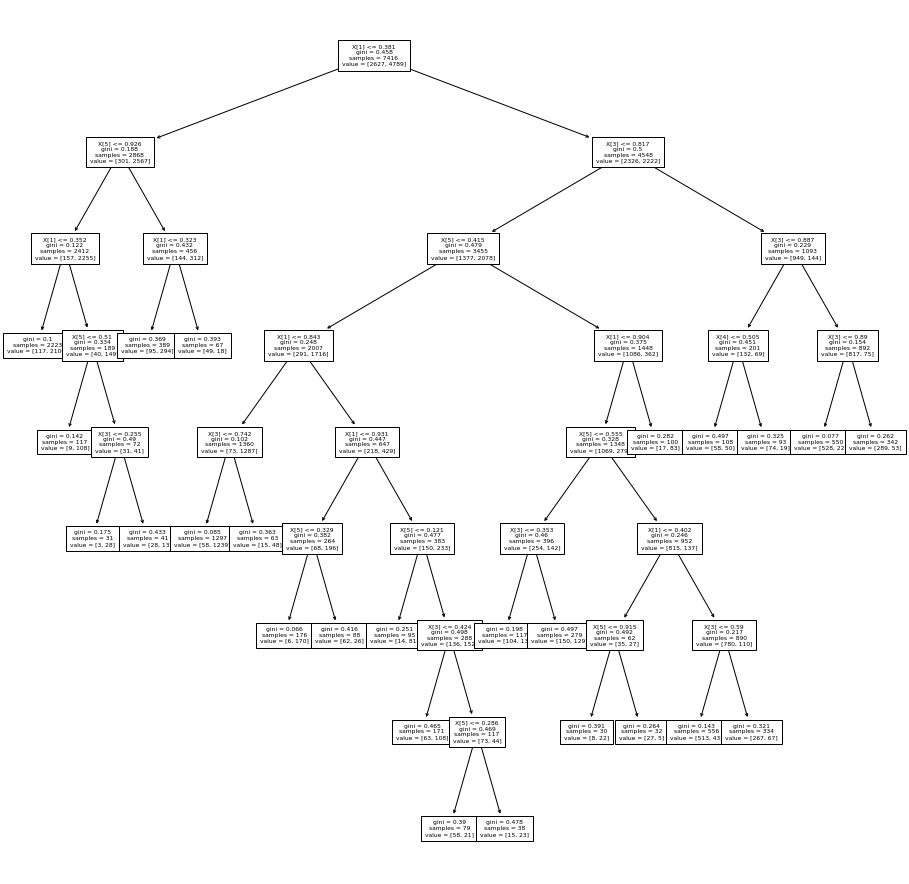

In [22]:
plt.figure(figsize=(16,16))
tree.plot_tree(lst_final[3],fontsize = 6)